# Домашнее задание "Теория оптимизации".

### Задание.
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.  

Постройте графики количества итераций оптимизации функции ackley от значения параметра.
### Дополнительное задание.
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping

import time
from tqdm import tqdm

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["font.size"] = 15

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [4]:
def strat_nit(strat=['best1bin','best1exp','rand1exp','randtobest1exp',
                     'currenttobest1exp','best2exp','rand2exp','randtobest1bin',
                     'currenttobest1bin','best2bin','rand2bin','rand1bin']):
    nits = {}
    for s in tqdm(strat):
        nits[s]=(differential_evolution(ackley, bounds, seed=42, strategy=s).nit)
    return nits, min(nits), nits[min(nits)]

res1 = strat_nit()
res1

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:14<00:00,  1.21s/it]


({'best1bin': 90,
  'best1exp': 147,
  'rand1exp': 246,
  'randtobest1exp': 156,
  'currenttobest1exp': 1000,
  'best2exp': 244,
  'rand2exp': 341,
  'randtobest1bin': 101,
  'currenttobest1bin': 1000,
  'best2bin': 166,
  'rand2bin': 232,
  'rand1bin': 168},
 'best1bin',
 90)

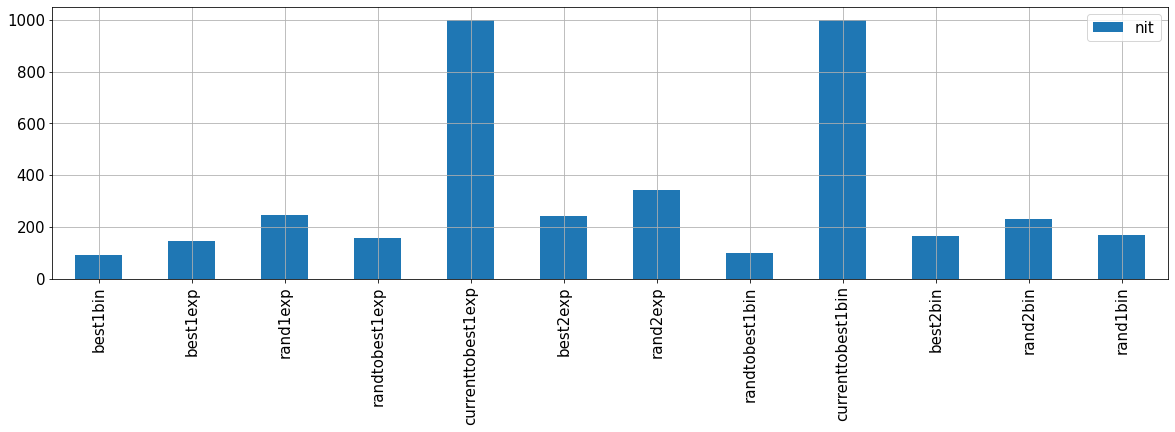

In [6]:
(pd.DataFrame(res1[0].values(),index=res1[0].keys(),columns=['nit'])
 .plot(kind='bar')
 .grid())

In [8]:
def best_nit(strategy=['best1bin','best1exp','rand1exp','randtobest1exp','best2exp',
                       'rand2exp','randtobest1bin','best2bin','rand2bin','rand1bin'],
             popsize = [10,15,20],
             tol = [0.01, 0.05],
             mutation = [0.5,(0,1.99)],
             recombination = [0,0.7,1],
             updating = ['immediate','deferred']
            ):
    nits = {}
    for s in tqdm(strategy):
        for p in tqdm(popsize):
            for t in tol:
                for m in mutation:
                    for r in recombination:
                        for u in updating:
                            nits[(differential_evolution(ackley,
                                                         bounds,
                                                         seed=42,
                                                         strategy=s,
                                                         popsize=p,
                                                         tol=t,
                                                         mutation=m,
                                                         recombination=r,
                                                         updating=u).nit)] = {'strategy':s,
                                                                              'popsize':p,
                                                                              'tol':t,
                                                                              'mutation':m,
                                                                              'recombination':r,
                                                                              'updating':u}
    return pd.DataFrame(nits.keys(),index=nits.values(),columns=['nit']).sort_values('nit')

res2 = best_nit()
res2

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:50<00:00, 53.08s/it]


,nit
"{'strategy': 'best1exp', 'popsize': 20, 'tol': 0.05, 'mutation': (0, 1.99), 'recombination': 1, 'updating': 'immediate'}",6
"{'strategy': 'best1exp', 'popsize': 20, 'tol': 0.01, 'mutation': (0, 1.99), 'recombination': 1, 'updating': 'immediate'}",9
"{'strategy': 'best1exp', 'popsize': 15, 'tol': 0.05, 'mutation': (0, 1.99), 'recombination': 1, 'updating': 'deferred'}",11
"{'strategy': 'best1exp', 'popsize': 15, 'tol': 0.01, 'mutation': (0, 1.99), 'recombination': 1, 'updating': 'deferred'}",14
"{'strategy': 'best1exp', 'popsize': 20, 'tol': 0.05, 'mutation': (0, 1.99), 'recombination': 1, 'updating': 'deferred'}",27
...,...
"{'strategy': 'rand2exp', 'popsize': 15, 'tol': 0.05, 'mutation': (0, 1.99), 'recombination': 0.7, 'updating': 'deferred'}",365
"{'strategy': 'rand2exp', 'popsize': 20, 'tol': 0.05, 'mutation': (0, 1.99), 'recombination': 0.7, 'updating': 'immediate'}",370
"{'strategy': 'rand2exp', 'popsize': 10, 'tol': 0.05, 'mutation': (0, 1.99), 'recombination': 0.7, 'updating': 'deferred'}",397
"{'strategy': 'rand2exp', 'popsize': 20, 'tol': 0.05, 'mutation': (0, 1.99), 'recombination': 0.7, 'updating': 'deferred'}",420


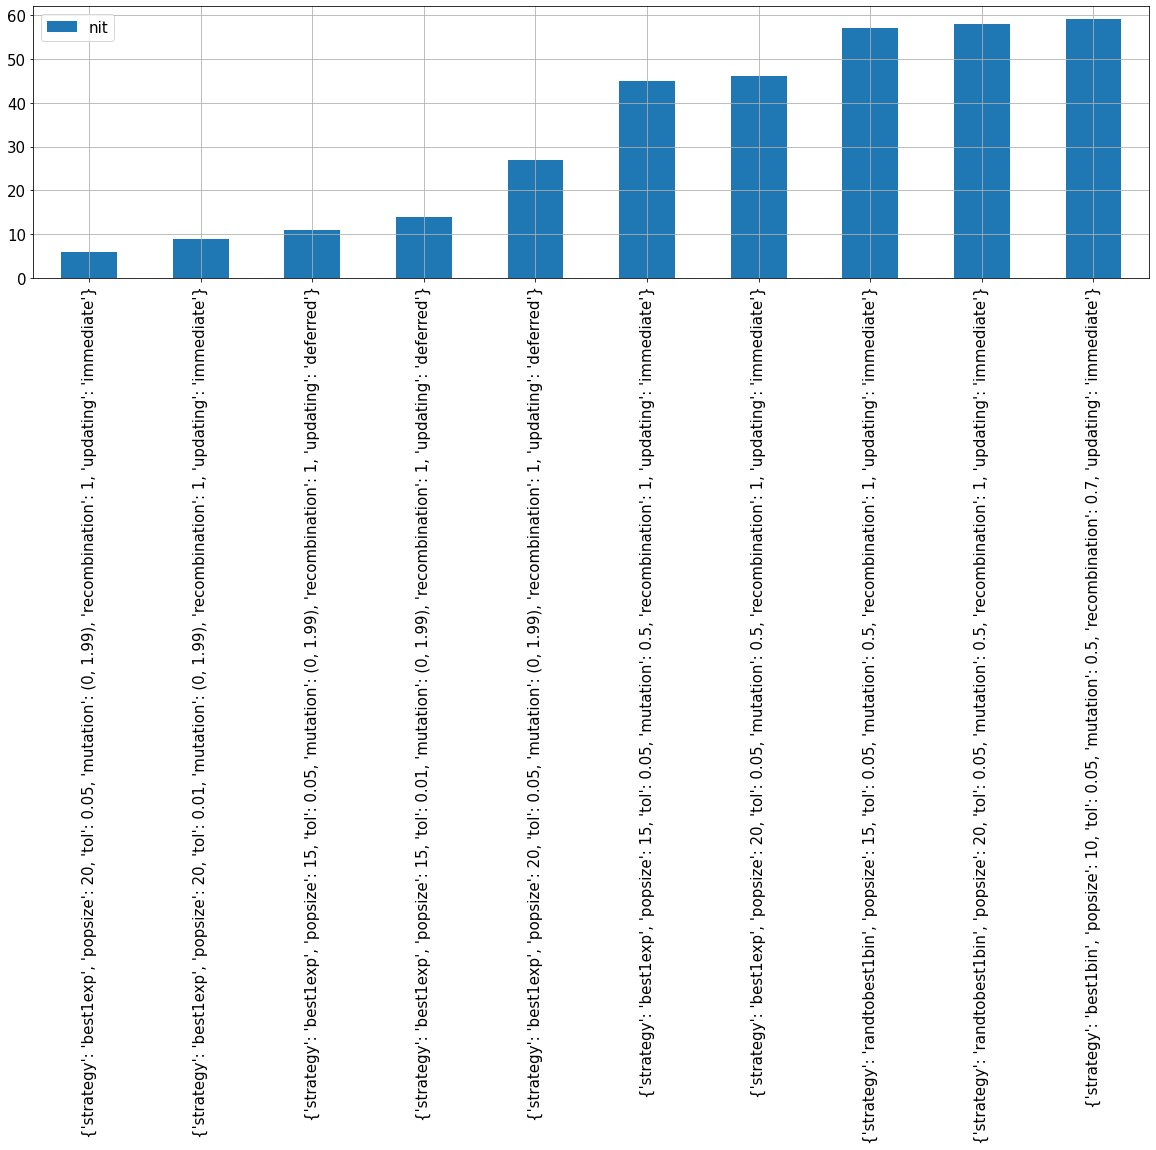

In [10]:
res2[:10].plot(kind='bar').grid()